In [27]:
pip install requests numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
website = 'https://www.cars.com/shopping/results/?stock_type=all&makes%5B%5D=mercedes_benz&models%5B%5D=&zip='

In [30]:
response = requests.get(website)

In [31]:
response.status_code

200

In [32]:
soup = BeautifulSoup(response.content, 'html.parser')

In [33]:
soup

<!DOCTYPE html>

<html class="ep-theme-spark" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title data-suffix=" | Cars.com">New and Used Mercedes-Benz for Sale | Cars.com</title>
<meta content="Shop Mercedes-Benz vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ Mercedes-Benz models nationwide." name="description"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Cars.com" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="New and Used Mercedes-Benz for Sale | Cars.com" property="og:title"/>
<meta content="https://www.cars.com/shopping/results/" property="og:url"/>
<meta content="Shop Mercedes-Benz vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ Mercedes-Benz models nationwide." property="og:d

In [34]:
results = soup.find_all('div', {'class': 'vehicle-card'})

In [35]:
len(results)

21

In [36]:
results[0]

<div class="vehicle-card inventory-ad" data-inventory-ad="true" data-koddi-click-tracking-url="https://cars.koddi.io/event-collection/beacon?action=click&amp;trackingData={trackingData}&amp;rank={rank}&amp;clientName=Cars&amp;beaconIssued=2023-10-20T22:49:07Z" data-koddi-deeplink-params="sd_campaign=inventorysearchads&amp;sd_digadprov=dealerinspire&amp;sd_channel=search&amp;sd_campaign_type=cars.com&amp;utm_campaign=cars.com_inventory_ads&amp;utm_medium=cpc&amp;utm_source=cars.com" data-koddi-impression-tracking-url="https://cars.koddi.io/event-collection/beacon?action=impression&amp;trackingData={trackingData}&amp;rank={rank}&amp;ts={ts}&amp;clientName=Cars&amp;beaconIssued=2023-10-20T22:49:07Z" data-koddi-listing-id="ec69b814-cf9f-4f5e-852c-dc4930997096" data-koddi-tracking-data="TrfC2RFAevAkhXYHIOS7VE9A/EpR0hfHNNSIcwVUlwg621DfR4wtrLvG6BfU4NFDE9DlssbnyKcwtJUEsWbLsCapS4E1VKTAS7nsbG74UVNO49ty8iq753fzdbzn0VEAK8sS5S8p5NGAZkvcE2JljTSGKjnxHeD9+xPUe9XZnpAMu3GWLPOg3OtB0oQfPwWA09gXCz57gCwk92L

### Target necessary data

In [37]:
# Name
# Mileage
# Rating
# Rating Count
# Price
# Car Dealer Name

### Name

In [38]:
# results[0].find('h2').get_text()

'2024 Mercedes-Benz Sprinter 2500 High Roof'

### Mileage

In [39]:
# results[20].find('div', {'class' : 'mileage'}).get_text()

### Rating

In [40]:
# results[10].find('span', {'class' :'sds-rating__count'}).get_text()

'4.6'

### Rating Count

In [41]:
# results[10].find('span', {'class' :'test1 sds-rating__link sds-button-link'}).get_text()

'(926 reviews)'

### Price

In [42]:
# results[0].find('span', {'class' :'primary-price'}).get_text()

'$72,133'

### Car Dealer Name

In [43]:
# results[0].find('div', {'class' : 'dealer-name'}).get_text().strip()

'Mercedes-Benz of Centerville'

### Put Everything inside a for-loop

In [44]:
name = []
mileage = []
dealer_name = []
rating = []
rating_count = []
price = []

for result in results:
    
    # name
    try:
        name.append(result.find('h2').get_text())
    except:
        name.append('NULL')
        
    # mileage
    try:
        mileage.append(result.find('div', {'class' : 'mileage'}).get_text())
    except:
        mileage.append('NULL')
    
    # dealer name
    try:
        dealer_name.append(result.find('div', {'class' : 'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('NULL')
        
    # rating
    try:
        rating.append(result.find('span', {'class' :'sds-rating__count'}).get_text())
    except:
        rating.append('NULL')
        
    # rating count
    try:
        rating_count.append(result.find('span', {'class' :'test1 sds-rating__link sds-button-link'}).get_text())
    except:
        rating_count.append('NULL')
        
    # price
    try:
        price.append(result.find('span', {'class' :'primary-price'}).get_text())
    except:
        price.append('NULL')

### Create Pandas Dataframe

In [45]:
car_dealer = pd.DataFrame({'Name':name, 'Mileage':mileage, 'Dealer Name':dealer_name, 'Rating':rating,
                           'Rating Count':rating_count, 'Price':price})

In [46]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
0,2024 Mercedes-Benz Sprinter 2500 High Roof,NULL,Mercedes-Benz of Centerville,NULL,NULL,"$72,133"
1,2023 Mercedes-Benz AMG EQS Base,NULL,Mercedes-Benz of Marin,NULL,(0 reviews),"$150,050"
2,2024 Mercedes-Benz GLE 350 Base 4MATIC,NULL,Mercedes-Benz of Buffalo,NULL,(13 reviews),"$68,545"
3,2023 Mercedes-Benz AMG GLC 43 4MATIC Coupe,NULL,Autobahn Motors,4.8,"(1,022 reviews)","$77,965"
4,2023 Mercedes-Benz AMG GT 43 Base,NULL,Silver Star Motors,4.5,(835 reviews),"$108,500"
5,2023 Mercedes-Benz GLA 250 Base 4MATIC,NULL,Elite Automotive Group,NULL,(5 reviews),"$46,965"
6,2023 Mercedes-Benz EQE 500 Base 4MATIC,NULL,Mercedes-Benz & Chevrolet in San Luis Obispo,NULL,(29 reviews),"$90,115"
7,2023 Mercedes-Benz AMG GLB 35 Base,NULL,Mercedes-Benz of South Orlando,4.4,"(1,434 reviews)","$58,295"
8,2023 Mercedes-Benz AMG GLC 43 4MATIC Coupe,NULL,Mercedes-Benz of White Plains,4.3,"(1,647 reviews)","$78,120"
9,2023 Mercedes-Benz Metris Base,NULL,Mercedes-Benz of White Plains,4.3,"(1,647 reviews)","$47,946"


### Data Cleaning

In [47]:
car_dealer['Rating Count'] = car_dealer['Rating Count'].apply(lambda x:x.strip('reviews)').strip('('))

In [48]:
car_dealer['Mileage'] = car_dealer['Mileage'].astype(str)
car_dealer['Mileage'] = car_dealer['Mileage'].str.replace(' mi.', '').str.replace('NULL', str(np.nan)).str.replace(',', '', regex=True).astype(float)

In [49]:
car_dealer['Price'] = car_dealer['Price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

In [50]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
0,2024 Mercedes-Benz Sprinter 2500 High Roof,NaN,Mercedes-Benz of Centerville,NULL,NULL,72133.0
1,2023 Mercedes-Benz AMG EQS Base,NaN,Mercedes-Benz of Marin,NULL,0,150050.0
2,2024 Mercedes-Benz GLE 350 Base 4MATIC,NaN,Mercedes-Benz of Buffalo,NULL,13,68545.0
3,2023 Mercedes-Benz AMG GLC 43 4MATIC Coupe,NaN,Autobahn Motors,4.8,"1,022",77965.0
4,2023 Mercedes-Benz AMG GT 43 Base,NaN,Silver Star Motors,4.5,835,108500.0
5,2023 Mercedes-Benz GLA 250 Base 4MATIC,NaN,Elite Automotive Group,NULL,5,46965.0
6,2023 Mercedes-Benz EQE 500 Base 4MATIC,NaN,Mercedes-Benz & Chevrolet in San Luis Obispo,NULL,29,90115.0
7,2023 Mercedes-Benz AMG GLB 35 Base,NaN,Mercedes-Benz of South Orlando,4.4,"1,434",58295.0
8,2023 Mercedes-Benz AMG GLC 43 4MATIC Coupe,NaN,Mercedes-Benz of White Plains,4.3,"1,647",78120.0
9,2023 Mercedes-Benz Metris Base,NaN,Mercedes-Benz of White Plains,4.3,"1,647",47946.0


# Visualizations and analysis

### Average Price by Dealer

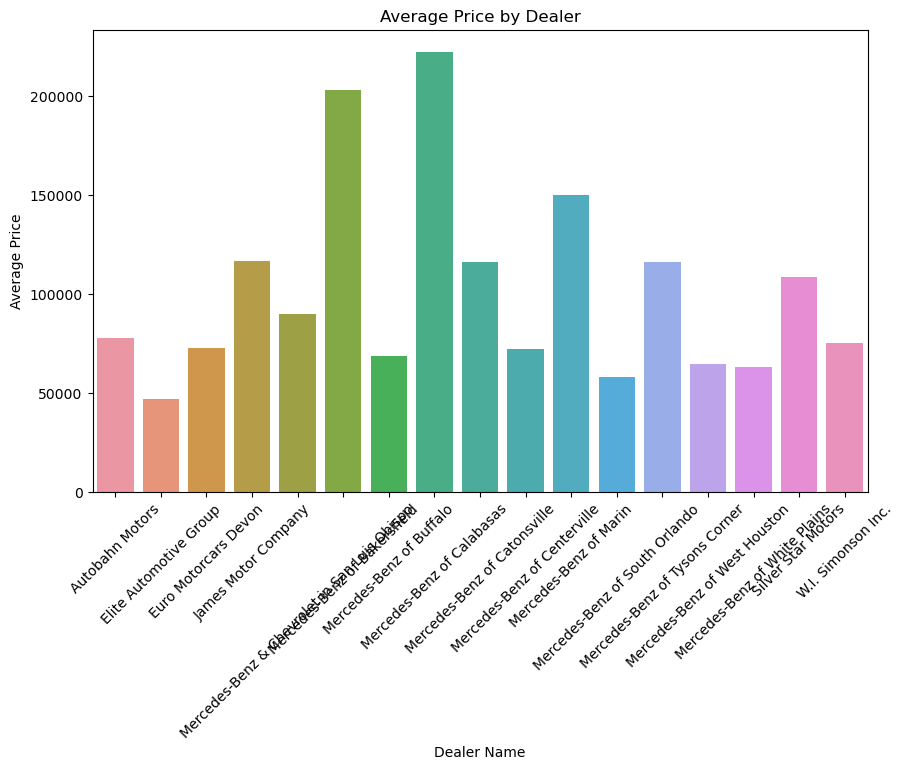

In [51]:
avg_price_by_dealer = car_dealer.groupby('Dealer Name')['Price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_dealer.index, y=avg_price_by_dealer.values)
plt.xticks(rotation=45)
plt.title('Average Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price')
plt.show()

### Correlation between Mileage and Price

In [52]:
correlation = car_dealer['Mileage'].corr(car_dealer['Price'])
print(f'Correlation between Mileage and Price: {correlation}')

Correlation between Mileage and Price: nan


### Price Distribution

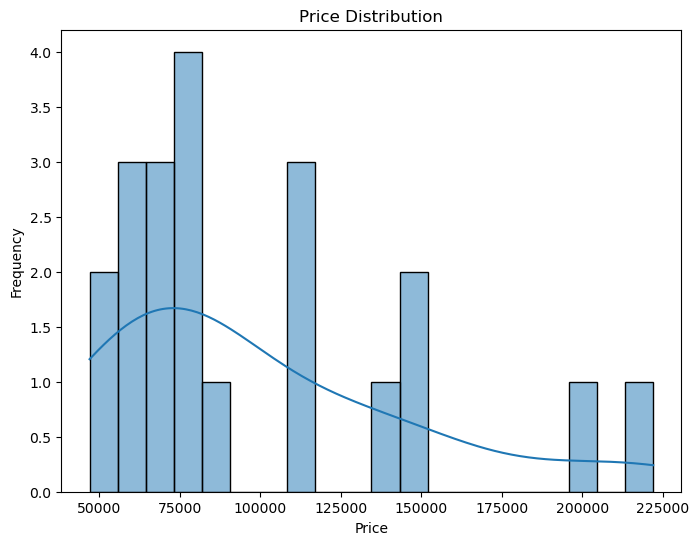

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(car_dealer['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Number of Ratings vs. Rating

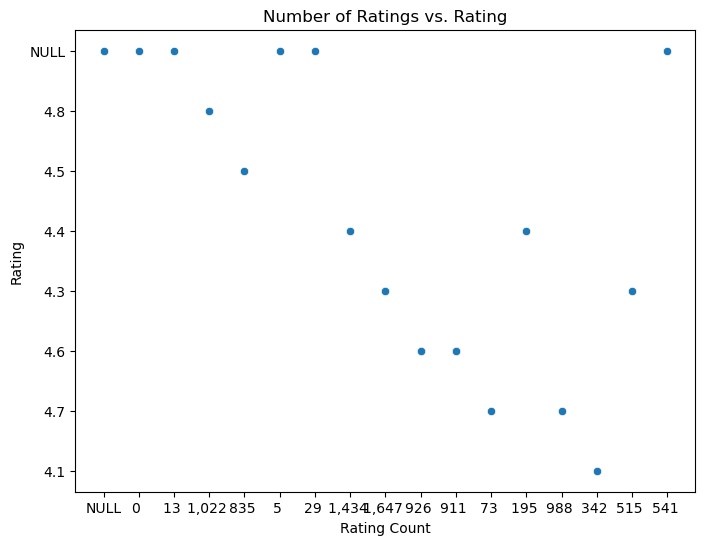

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=car_dealer['Rating Count'], y=car_dealer['Rating'])
plt.title('Number of Ratings vs. Rating')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

### Top Models by Frequency

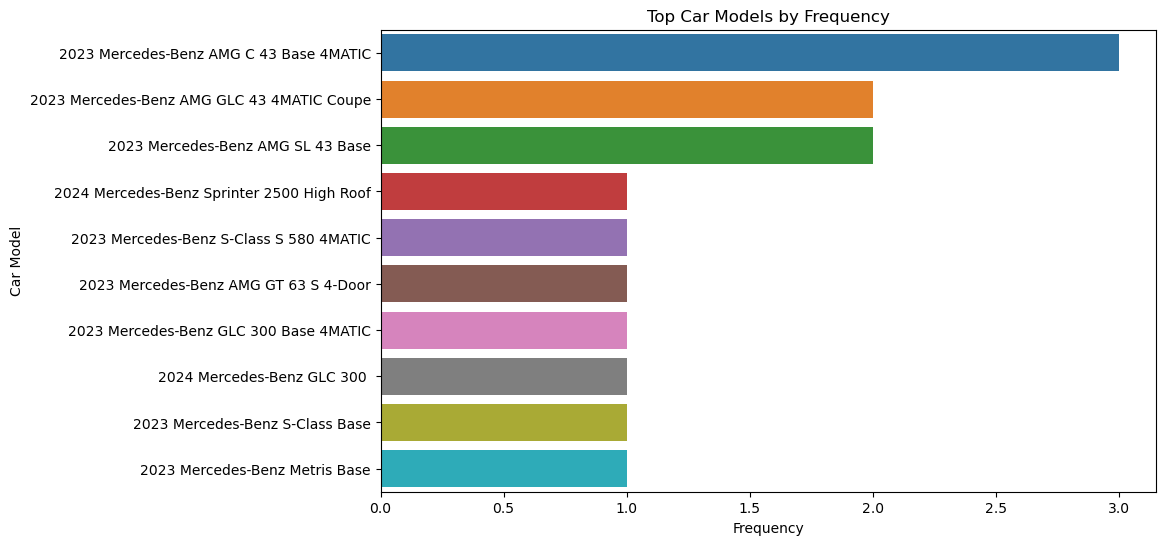

In [55]:
top_models = car_dealer['Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.show()

### Price Distribution by Car Model

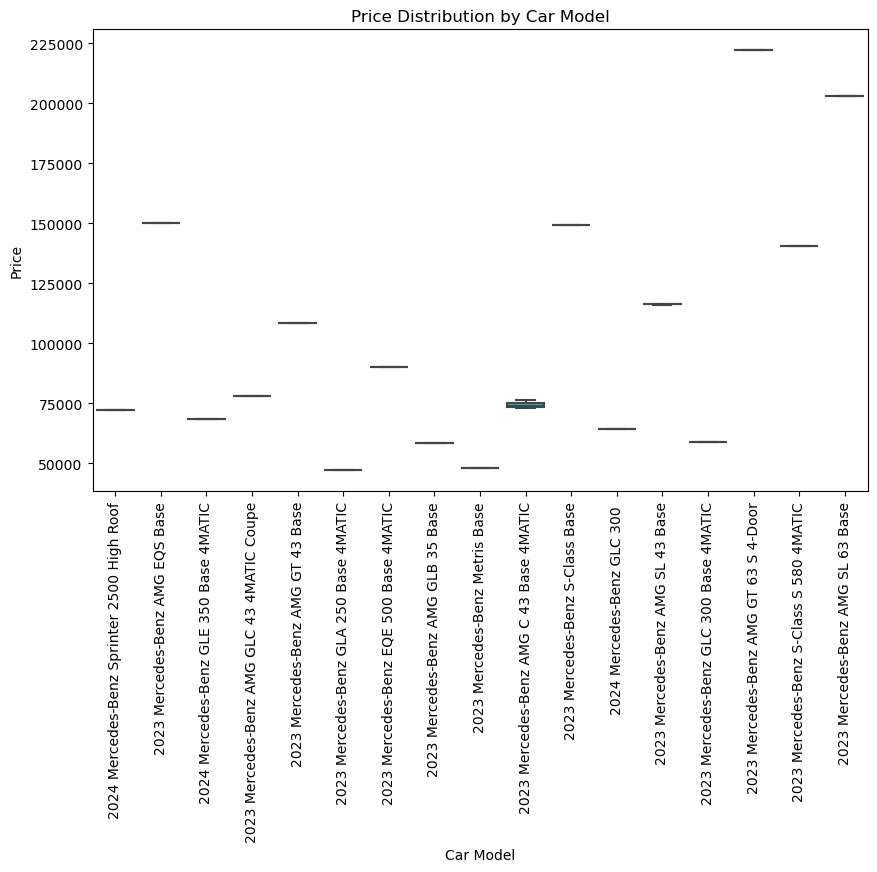

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='Price', data=car_dealer)
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.show()

### Price vs. Dealer Scatter Plot

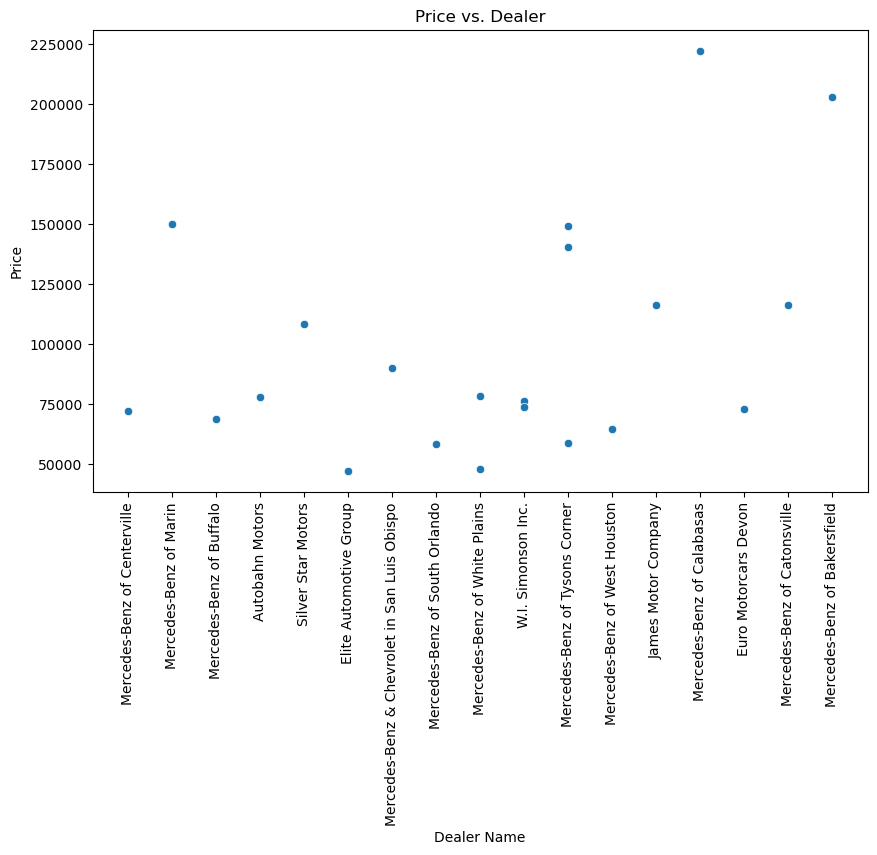

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dealer Name', y='Price', data=car_dealer)
plt.xticks(rotation=90)
plt.title('Price vs. Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Price')
plt.show()

### Average Mileage by Car Model

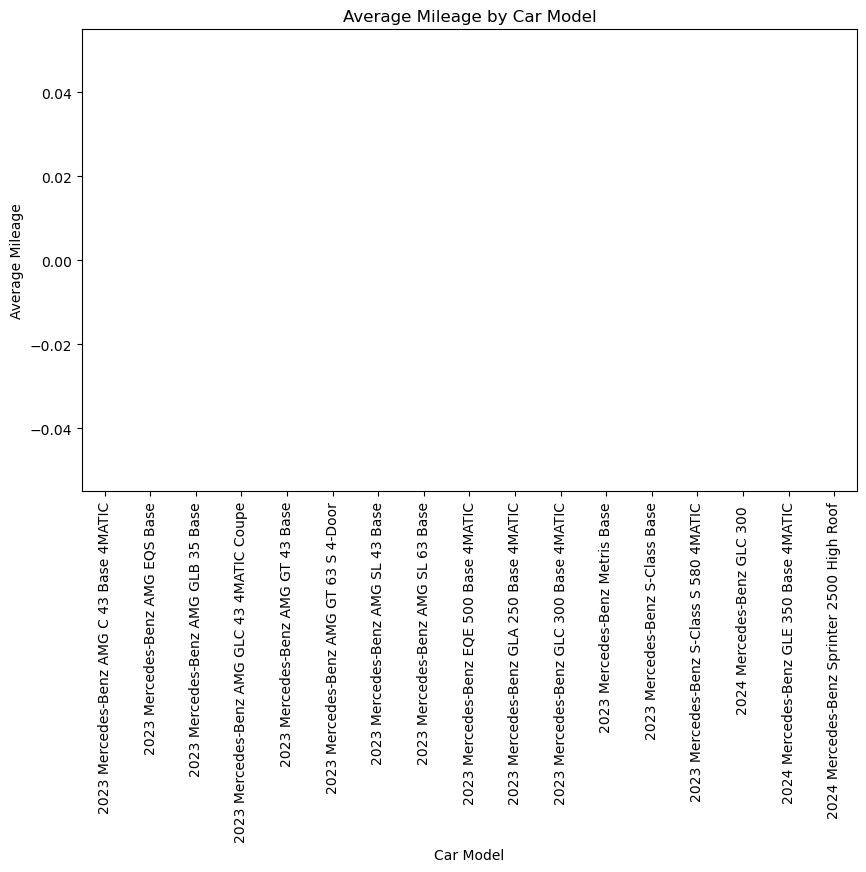

In [58]:
average_mileage_by_model = car_dealer.groupby('Name')['Mileage'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_mileage_by_model.index, y=average_mileage_by_model.values)
plt.xticks(rotation=90)
plt.title('Average Mileage by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Average Mileage')
plt.show()

### Save data to Excel

In [59]:
# Create a directory named 'data' if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Specify the path to the Excel file in the 'data' folder
file_path = os.path.join('data', 'single_page_car.xlsx')

# Assuming you have a DataFrame named 'car_dealer'
car_dealer.to_excel(file_path, index=False)

### Pagination

In [60]:
name = []
mileage = []
dealer_name = []
rating = []
rating_count = []
price = []

for i in range(1,30):
    
    # website 
    website = 'https://www.cars.com/shopping/results/?makes[]=mercedes_benz&models[]=&page=' + str(i) + '&stock_type=all&zip='
    
    # request
    response = requests.get(website)
    
    # soup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # results
    results = soup.find_all('div', {'class': 'vehicle-card'})
    
    for result in results:
        
            # name
            try:
                name.append(result.find('h2').get_text())
            except:
                name.append('NULL')

            # mileage
            try:
                mileage.append(result.find('div', {'class' : 'mileage'}).get_text())
            except:
                mileage.append('NULL')

            # dealer name
            try:
                dealer_name.append(result.find('div', {'class' : 'dealer-name'}).get_text().strip())
            except:
                dealer_name.append('NULL')

            # rating
            try:
                rating.append(result.find('span', {'class' :'sds-rating__count'}).get_text())
            except:
                rating.append('NULL')

            # rating count
            try:
                rating_count.append(result.find('span', {'class' :'test1 sds-rating__link sds-button-link'}).get_text())
            except:
                rating_count.append('NULL')

            # price
            try:
                price.append(result.find('span', {'class' :'primary-price'}).get_text())
            except:
                price.append('NULL')

### Create Pandas Dataframe

In [61]:
car_dealer = pd.DataFrame({'Name':name, 'Mileage':mileage, 'Dealer Name':dealer_name, 'Rating':rating,
                           'Rating Count':rating_count, 'Price':price})

In [62]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
0,2024 Mercedes-Benz Sprinter 2500 High Roof,NULL,Mercedes-Benz of Centerville,NULL,NULL,"$72,133"
1,2023 Mercedes-Benz AMG GLC 43 4MATIC Coupe,NULL,Autobahn Motors,4.8,"(1,022 reviews)","$77,965"
2,2024 Mercedes-Benz GLS 450 4MATIC,NULL,Mercedes-Benz of North Olmsted,4.7,"(1,534 reviews)","$106,820"
3,2023 Mercedes-Benz EQB 300 Base 4MATIC,NULL,Mercedes-Benz of Des Moines,4.6,(465 reviews),"$59,375"
4,2023 Mercedes-Benz AMG EQS Base,NULL,Mercedes-Benz of Marin,NULL,(0 reviews),"$150,050"
...,...,...,...,...,...,...
604,2023 Mercedes-Benz S-Class 4MATIC,NULL,Mercedes-Benz of Long Beach,NULL,(688 reviews),"$124,710"
605,2023 Mercedes-Benz S-Class Base,NULL,Sears Imported Autos,4.9,"(2,336 reviews)","$157,715"
606,2023 Mercedes-Benz EQS 580 Base 4MATIC,NULL,Mercedes-Benz of Chesterfield,NULL,(100 reviews),"$145,265"
607,2023 Mercedes-Benz EQS 450+ Base,NULL,Mercedes-Benz of Atlanta Northeast,4.7,"(2,101 reviews)","$117,940"


### Data Cleaning

In [63]:
car_dealer['Rating Count'] = car_dealer['Rating Count'].apply(lambda x:x.strip('reviews)').strip('('))

In [64]:
car_dealer['Mileage'] = car_dealer['Mileage'].astype(str).str.replace(' mi.', '').replace('NULL', np.nan).str.replace(',', '', regex=True).astype(float)

In [65]:
# Replace non-numeric values with NaN
car_dealer['Price'] = car_dealer['Price'].str.replace('$', '').str.replace(',', '')
car_dealer['Price'] = pd.to_numeric(car_dealer['Price'], errors='coerce')
car_dealer['Price'] = car_dealer['Price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

In [66]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
0,2024 Mercedes-Benz Sprinter 2500 High Roof,NaN,Mercedes-Benz of Centerville,NULL,NULL,72133.0
1,2023 Mercedes-Benz AMG GLC 43 4MATIC Coupe,NaN,Autobahn Motors,4.8,"1,022",77965.0
2,2024 Mercedes-Benz GLS 450 4MATIC,NaN,Mercedes-Benz of North Olmsted,4.7,"1,534",106820.0
3,2023 Mercedes-Benz EQB 300 Base 4MATIC,NaN,Mercedes-Benz of Des Moines,4.6,465,59375.0
4,2023 Mercedes-Benz AMG EQS Base,NaN,Mercedes-Benz of Marin,NULL,0,150050.0
...,...,...,...,...,...,...
604,2023 Mercedes-Benz S-Class 4MATIC,NaN,Mercedes-Benz of Long Beach,NULL,688,124710.0
605,2023 Mercedes-Benz S-Class Base,NaN,Sears Imported Autos,4.9,"2,336",157715.0
606,2023 Mercedes-Benz EQS 580 Base 4MATIC,NaN,Mercedes-Benz of Chesterfield,NULL,100,145265.0
607,2023 Mercedes-Benz EQS 450+ Base,NaN,Mercedes-Benz of Atlanta Northeast,4.7,"2,101",117940.0


### Average Price by Dealer

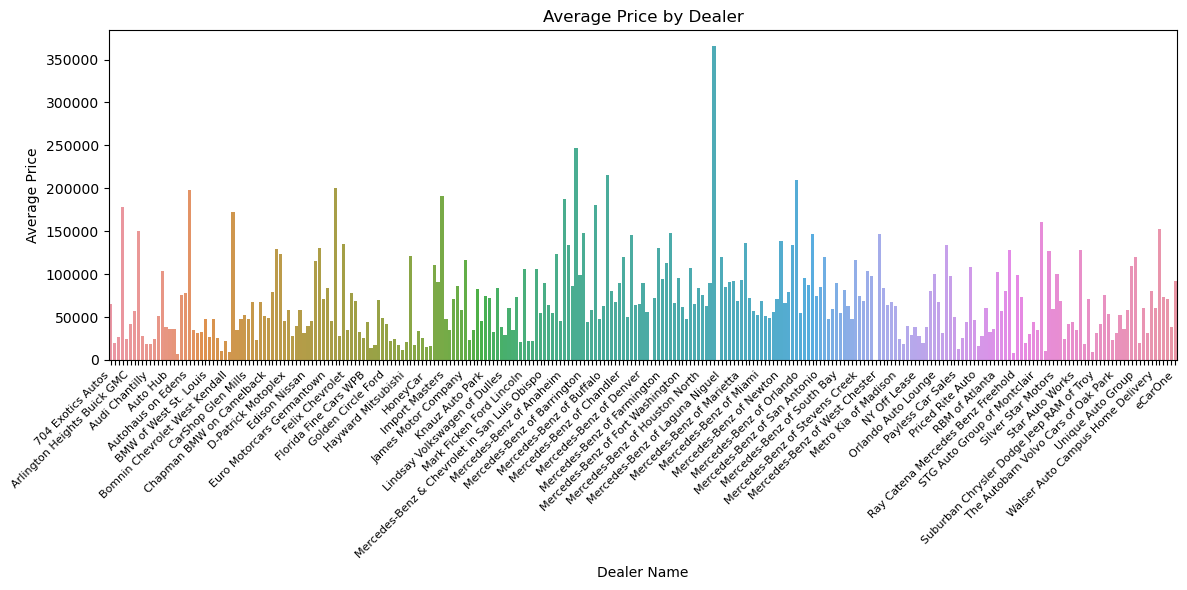

In [67]:
avg_price_by_dealer = car_dealer.groupby('Dealer Name')['Price'].mean()

plt.figure(figsize=(12, 6))

# Create the bar plot
barplot = sns.barplot(x=avg_price_by_dealer.index, y=avg_price_by_dealer.values)

# Rotate x-axis labels to a 45-degree angle
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Adjust the font size

plt.title('Average Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price')

# Display every nth label and abbreviate them if necessary
n = 5  # Display every 5th label
labels = barplot.get_xticklabels()
for i in range(len(labels)):
    if i % n != 0:
        labels[i].set_visible(False)
    else:
        label_text = labels[i].get_text()
        if len(label_text) > 12:
            label_text = label_text[:12] + '...'
        labels[i].set_text(label_text)

plt.tight_layout()
plt.show()

### Correlation between Mileage and Price

In [68]:
correlation = car_dealer['Mileage'].corr(car_dealer['Price'])
print(f'Correlation between Mileage and Price: {correlation}')

Correlation between Mileage and Price: -0.5852915032340124


### Price Distribution

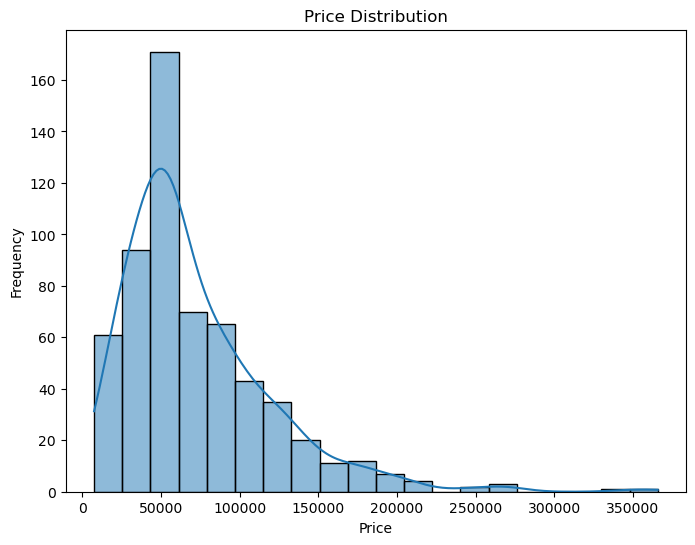

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(car_dealer['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Number of Ratings vs. Rating

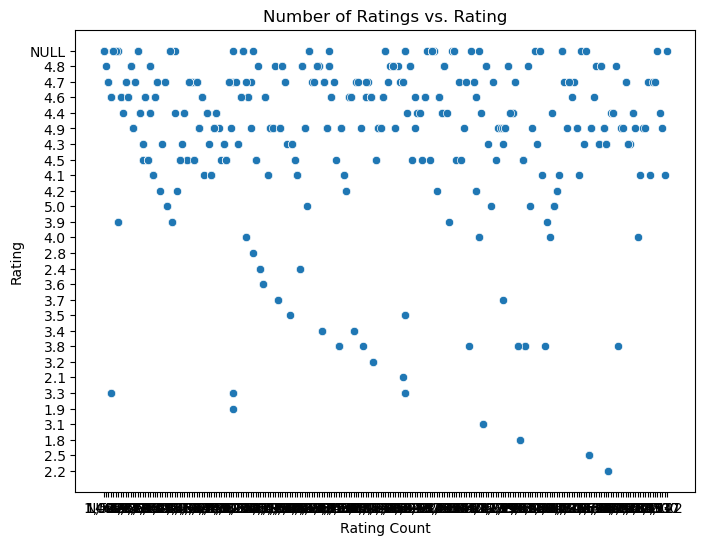

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=car_dealer['Rating Count'], y=car_dealer['Rating'])
plt.title('Number of Ratings vs. Rating')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

### Top Models by Frequency

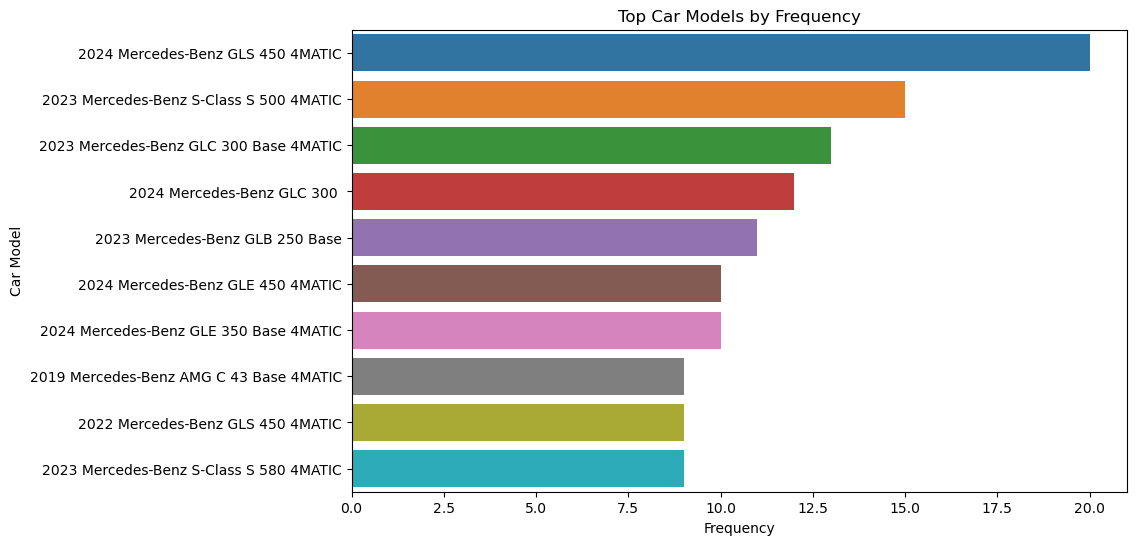

In [71]:
top_models = car_dealer['Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.show()

### Price Distribution by Car Model

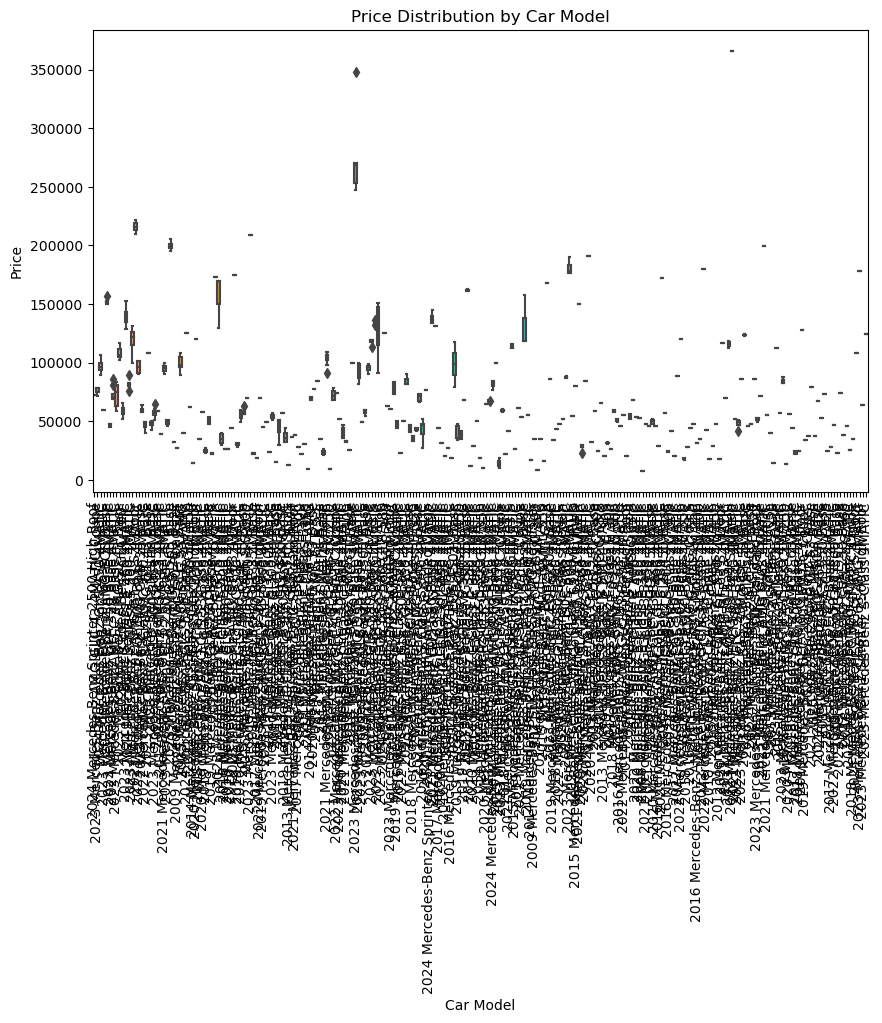

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='Price', data=car_dealer)
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.show()

### Price vs. Dealer Scatter Plot

C:\Users\DumisaneMagagula\AppData\Local\Temp\ipykernel_19152\1331069828.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter.set_xticklabels(scatter.get_xticklabels(), rotation=60, fontsize=8)  # Adjust the font size


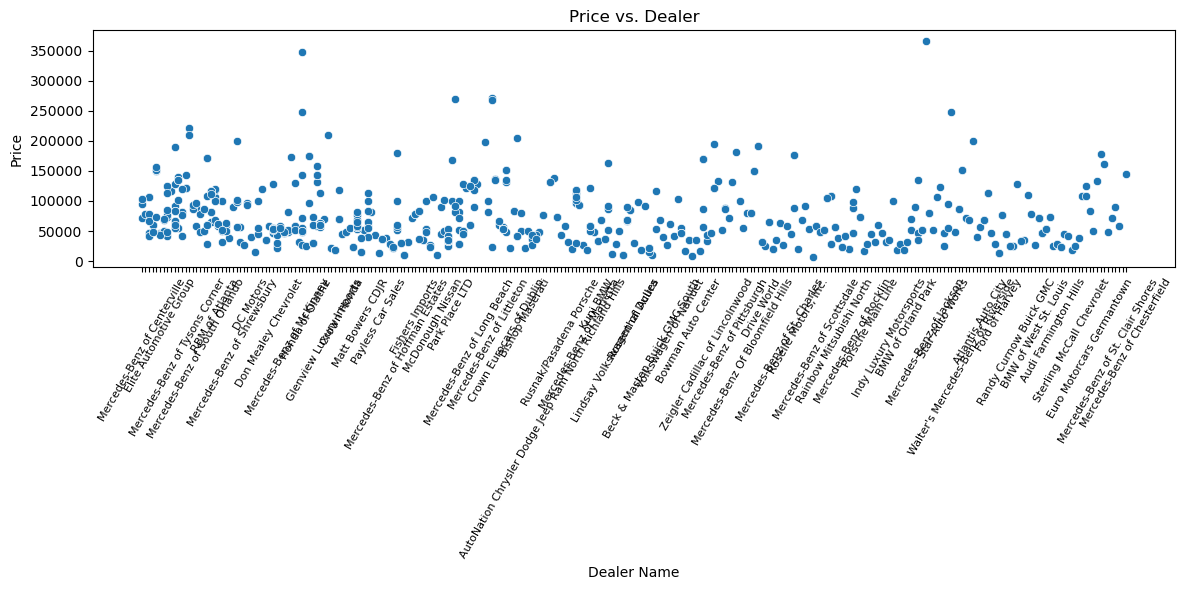

In [73]:
plt.figure(figsize=(12, 6))

# Create the scatterplot
scatter = sns.scatterplot(x='Dealer Name', y='Price', data=car_dealer)

# Rotate x-axis labels to a 60-degree angle
scatter.set_xticklabels(scatter.get_xticklabels(), rotation=60, fontsize=8)  # Adjust the font size

plt.title('Price vs. Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Price')

# Display every nth label (e.g., every 5th label) and abbreviate them
n = 5
labels = scatter.get_xticklabels()
for i in range(len(labels)):
    if i % n != 0:
        labels[i].set_visible(False)
    else:
        label_text = labels[i].get_text()
        if len(label_text) > 12:
            label_text = label_text[:12] + '...'
        labels[i].set_text(label_text)

plt.tight_layout()
plt.show()

### Average Mileage by Car Model

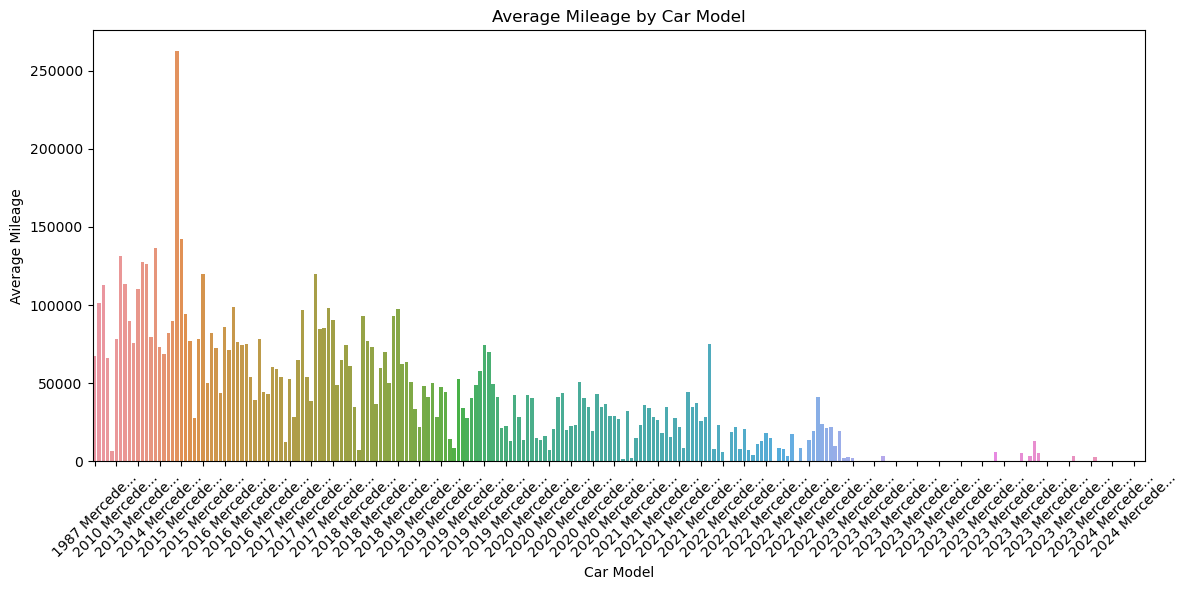

In [74]:
average_mileage_by_model = car_dealer.groupby('Name')['Mileage'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=average_mileage_by_model.index, y=average_mileage_by_model.values)
plt.xticks(rotation=45)
plt.title('Average Mileage by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Average Mileage')

# Display every nth label and use a more compact representation
n = 5
filtered_labels = average_mileage_by_model.index[::n]
filtered_indices = range(0, len(average_mileage_by_model.index), n)

plt.xticks(filtered_indices, [label[:12] + '...' for label in filtered_labels])

plt.tight_layout()
plt.show()

### Save data to Excel

In [75]:
# Create a directory named 'data' if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Specify the path to the Excel file in the 'data' folder
file_path = os.path.join('data', 'pages_car.xlsx')

# Assuming you have a DataFrame named 'car_dealer'
car_dealer.to_excel(file_path, index=False)